## “What are the people more likely to survive to the Mexican pandemic?”

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sc
import matplotlib.ticker as mtick
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
maybe = train.copy()

# Split the train set given to us into train (80% of original train dataset) and validation (20% of original train dataset)
train, val = train_test_split(train, test_size = 0.2) 

In [3]:
train.head()

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Medical_Tent,City,Deceased
95,96,6828,3,Miss Marlene Jaime,NaN,0,0,219,NaN,Taos,0
744,745,6480,1,Mr. Jermaine Keith,1982.0,0,0,0,NaN,Santa Fe,1
463,464,14287,3,Ms. Holly Raquel,1995.0,0,0,218,NaN,Santa Fe,1
14,15,6507,3,Miss Pearl Elsie,NaN,0,0,217,NaN,Taos,0
634,635,11508,3,Mr. Irvin Trevor,2001.0,0,0,285,NaN,Santa Fe,1


In [4]:
# Check the datatypes on our dataset
train.dtypes

Patient_ID                     int64
Family_Case_ID                 int64
Severity                       int64
Name                          object
Birthday_year                float64
Parents_Children_Infected      int64
Partner_Siblings_Infected      int64
Medical_Expenses_Family        int64
Medical_Tent                  object
City                          object
Deceased                       int64
dtype: object

In [5]:
# Some statistical information 
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,720.0,448.405556,261.341137,1.0,222.75,450.5,670.25,900.0
Family_Case_ID,720.0,13288.687500,6390.765332,345.0,8166.50,13516.0,18827.25,24471.0
Severity,720.0,2.294444,0.841862,1.0,1.75,3.0,3.00,3.0
Birthday_year,578.0,1989.980969,14.860809,1940.0,1981.00,1991.0,1999.00,2019.0
Parents_Children_Infected,720.0,0.388889,0.834839,0.0,0.00,0.0,0.00,6.0
Partner_Siblings_Infected,720.0,0.536111,1.113241,0.0,0.00,0.0,1.00,8.0
Medical_Expenses_Family,720.0,915.518056,1390.092982,0.0,222.00,405.0,868.00,14345.0
Deceased,720.0,0.606944,0.488769,0.0,0.00,1.0,1.00,1.0


In [6]:
# A description of the categorical features
train.describe(include = 'O').T

,count,unique,top,freq
Name,720,720,Ms. Brandi Viola,1
Medical_Tent,166,8,C,49
City,718,3,Santa Fe,521


In [7]:
# A quick glance on the values of our features, just to give us an hint on what we'll have to do on 
# feature engineering and data validation
print('Severity')
print(train['Severity'].value_counts())
print('-----------------------')
print('Birthday_year')
print(train['Birthday_year'].value_counts())
print('-----------------------')
print('Parents_Children_Infected')
print(train['Parents_Children_Infected'].value_counts())
print('-----------------------')
print('Partner_Siblings_Infected')
print(train['Partner_Siblings_Infected'].value_counts())
print('-----------------------')
print('Medical_Expenses_Family')
print(train['Medical_Expenses_Family'].value_counts())
print('-----------------------')
print('Deceased')
print(train['Deceased'].value_counts())
print('-----------------------')

Severity
3    392
1    180
2    148
Name: Severity, dtype: int64
-----------------------
Birthday_year
1996.0    23
1990.0    22
1995.0    21
1998.0    21
1991.0    21
          ..
1940.0     1
1946.0     1
1961.0     1
1954.0     1
1956.0     1
Name: Birthday_year, Length: 70, dtype: int64
-----------------------
Parents_Children_Infected
0    549
1     93
2     64
5      5
4      4
3      4
6      1
Name: Parents_Children_Infected, dtype: int64
-----------------------
Partner_Siblings_Infected
0    485
1    174
2     23
4     16
3     13
8      6
5      3
Name: Partner_Siblings_Infected, dtype: int64
-----------------------
Medical_Expenses_Family
364     36
221     35
225     33
217     31
728     23
        ..
566      1
248      1
252      1
1565     1
617      1
Name: Medical_Expenses_Family, Length: 200, dtype: int64
-----------------------
Deceased
1    437
0    283
Name: Deceased, dtype: int64
-----------------------


In [8]:
# Checking how many missing values are present on our train set, and how would the removal of rows with MV's would 
# impact our dataset
train_MV = train.copy()
train_MV.dropna(inplace = True)
train_MV.shape
print(train.shape[0] - train_MV.shape[0]) # Number of clients with atleast 1 missing value
print('We would lose ' + "{:.2f}".format((train.shape[0] - train_MV.shape[0]) / train.shape[0] * 100) + '% of our data if we were to remove every row' + 
      ' that contains atleast one missing value.')

570
We would lose 79.17% of our data if we were to remove every row that contains atleast one missing value.


There are 64  with Taos city.
There are 521  with Santa Fe city.
There are 133  with Albuquerque city.


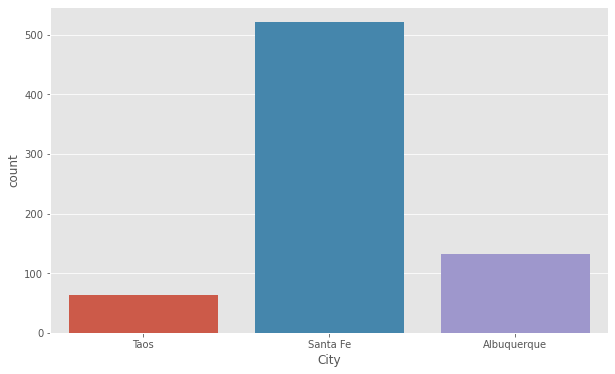

In [9]:
# Check the distribuition of individuals per city.

for City in train['City'].unique():
    if len(train['City'][train.City == City]) != 0:
        print('There are ' + str(len(train['City'][train.City == City])) + '  with ' + str(City) + ' city.')

plt.figure(figsize = (10,6))
sns.countplot(data=train, x='City')
plt.show()

In [10]:
# Statistical insights on our features - standard deviation
train.std()

Patient_ID                    261.341137
Family_Case_ID               6390.765332
Severity                        0.841862
Birthday_year                  14.860809
Parents_Children_Infected       0.834839
Partner_Siblings_Infected       1.113241
Medical_Expenses_Family      1390.092982
Deceased                        0.488769
dtype: float64

In [11]:
# Statistical insights on our features - skewness
train.skew()

Patient_ID                  -0.004644
Family_Case_ID              -0.100080
Severity                    -0.599592
Birthday_year               -0.369276
Parents_Children_Infected    2.835732
Partner_Siblings_Infected    3.675592
Medical_Expenses_Family      4.482055
Deceased                    -0.438827
dtype: float64

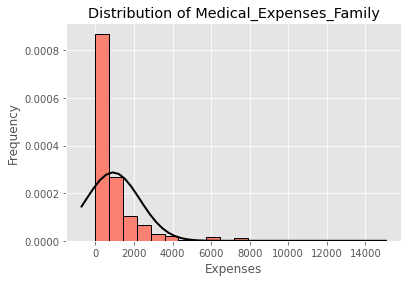

In [12]:
# A plot of the distribution of medical expenses feature
from scipy.stats import norm

plt.hist(train['Medical_Expenses_Family'].values, bins=20, density = True,  color='salmon', edgecolor='black', linewidth=1)
# distribution line in the histogram
mu, std = norm.fit(train['Medical_Expenses_Family'].values)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title("Distribution of Medical_Expenses_Family")
plt.xlabel("Expenses")
plt.ylabel("Frequency")
plt.show()

In [13]:
train['Medical_Expenses_Family'].max()

14345

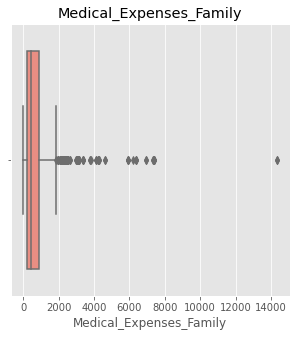

In [14]:
# Checking for outliers on Medical expenses feature
plt.figure(figsize = (5,5))
sns.boxplot(data = train, x = 'Medical_Expenses_Family', color = 'salmon')
plt.title('Medical_Expenses_Family')
plt.show()

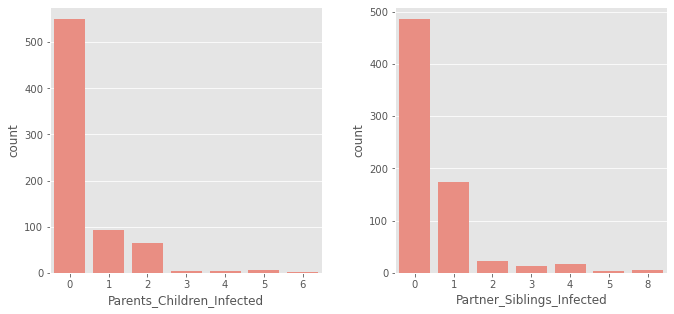

In [15]:
# Checking the distribuition on the features Parents_Children_Infected and Partner_Siblings_Infected
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.countplot(data = train, x = 'Parents_Children_Infected', ax = ax[0], color = 'salmon')
sns.countplot(data = train, x = 'Partner_Siblings_Infected', ax = ax[1], color = 'salmon')
plt.tight_layout(pad = 3)
plt.show()

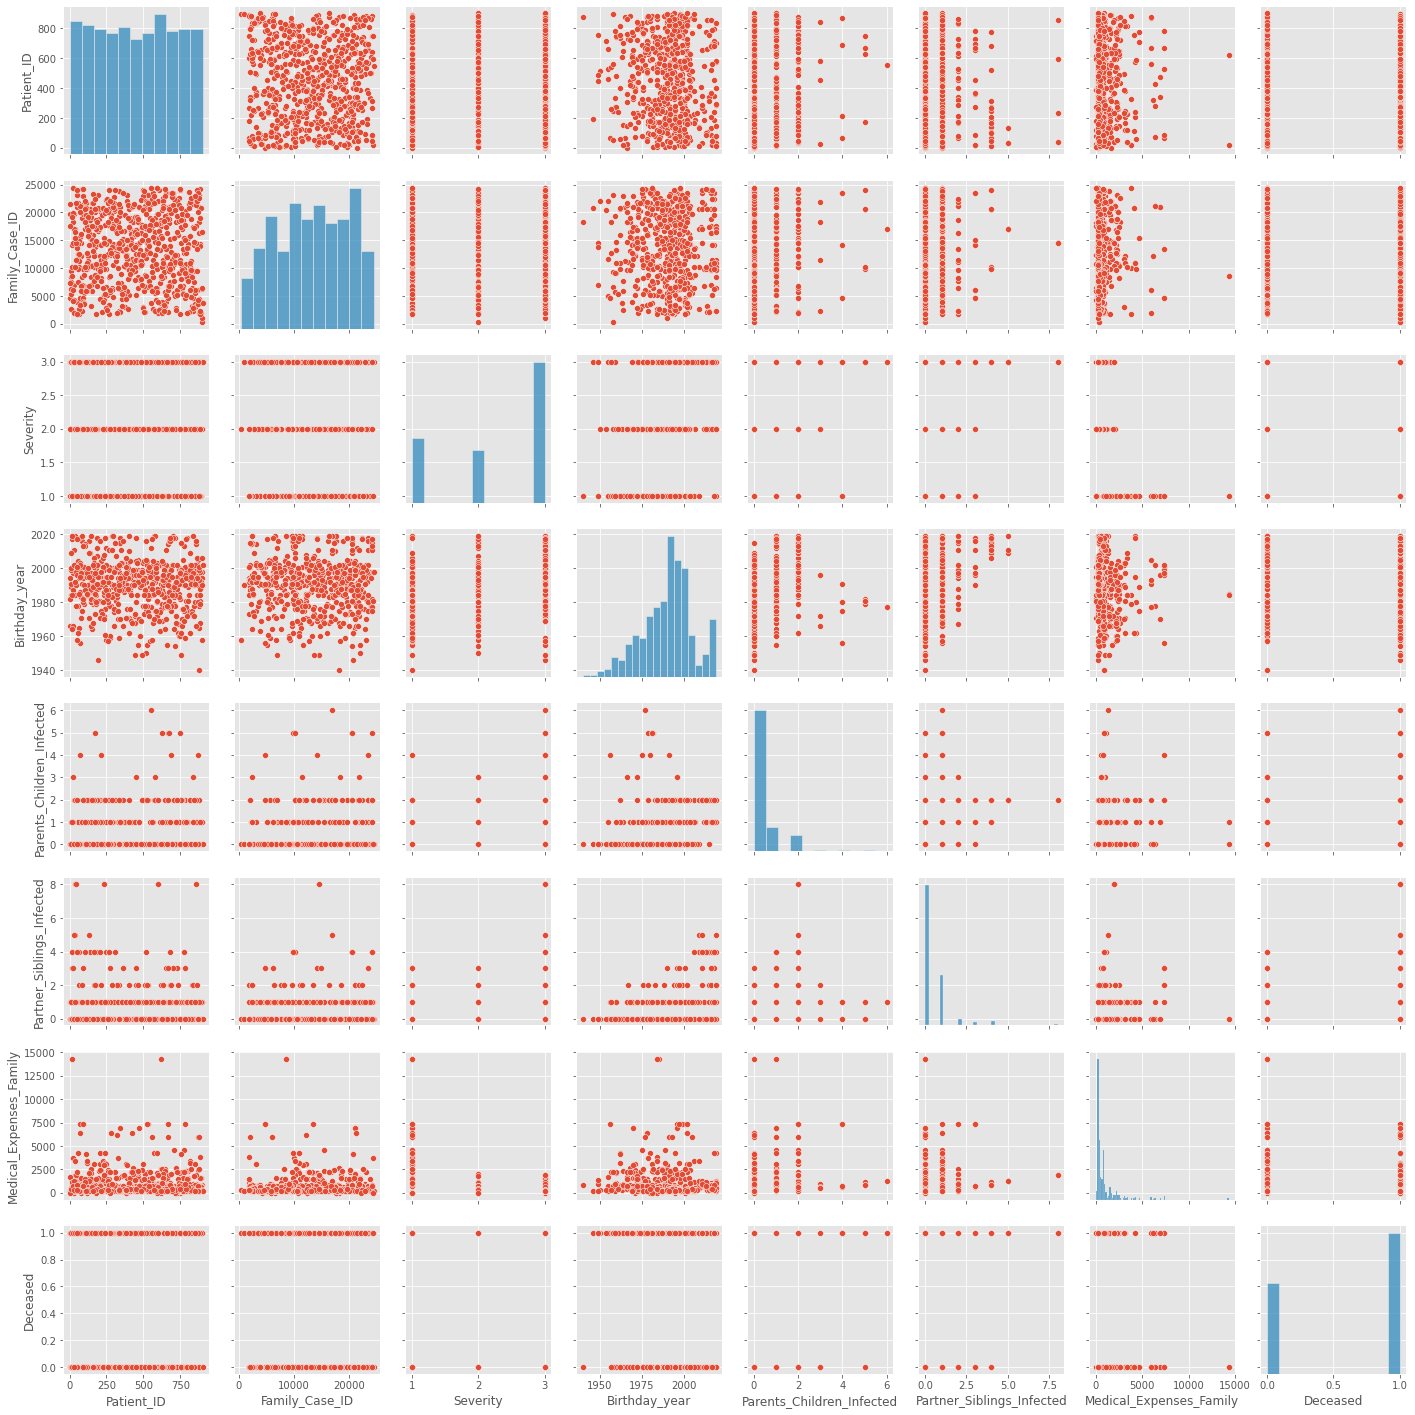

In [16]:
# A pairplot that we tried that could've gotten us some insights on data
sns.pairplot(train)

In [17]:
train['Deceased'].value_counts()

1    437
0    283
Name: Deceased, dtype: int64

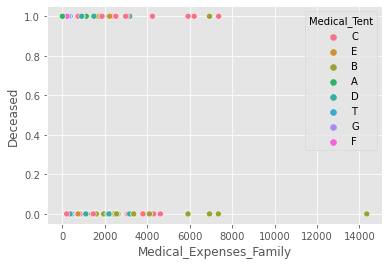

In [18]:
# An attempt on plotting if there's any pattern between the features Medical expenses and deceased, given the tent.
# However we lack information on the tents.
sns.scatterplot(x = 'Medical_Expenses_Family', y = 'Deceased', hue = 'Medical_Tent', data = train)

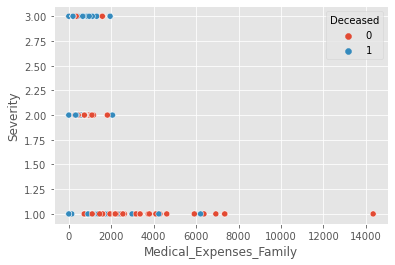

In [19]:
# An attempt on plotting if there's any pattern between the features Medical expenses and Severity, 
# given if they deceased or not
sns.scatterplot(x = 'Medical_Expenses_Family', y = 'Severity', hue = 'Deceased', data = train)

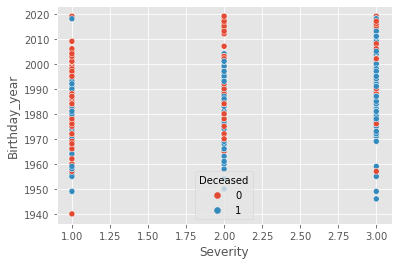

In [20]:
# An attempt on plotting if there's any pattern between the features Severity and age, 
# given if they deceased or not
sns.scatterplot(x = 'Severity', y = 'Birthday_year', hue = 'Deceased', data = train)

In [21]:
# A quick overview on the correlations within our dataset
train.corr().T

,Patient_ID,Family_Case_ID,Severity,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Deceased
Patient_ID,1.000000,-0.024289,-0.065649,-0.079401,-0.005951,-0.098672,-0.006153,-0.030218
Family_Case_ID,-0.024289,1.000000,-0.024572,-0.052717,0.067294,0.041394,-0.004345,0.002858
Severity,-0.065649,-0.024572,1.000000,0.373926,0.026825,0.079164,-0.551148,0.335736
Birthday_year,-0.079401,-0.052717,0.373926,1.000000,0.164635,0.327357,-0.087137,-0.081051
Parents_Children_Infected,-0.005951,0.067294,0.026825,0.164635,1.000000,0.405388,0.238410,-0.064572
Partner_Siblings_Infected,-0.098672,0.041394,0.079164,0.327357,0.405388,1.000000,0.177111,0.042737
Medical_Expenses_Family,-0.006153,-0.004345,-0.551148,-0.087137,0.238410,0.177111,1.000000,-0.249771
Deceased,-0.030218,0.002858,0.335736,-0.081051,-0.064572,0.042737,-0.249771,1.000000


In [22]:
train['Medical_Tent'].value_counts()

C    49
B    42
D    28
E    23
F    10
A    10
G     3
T     1
Name: Medical_Tent, dtype: int64

In [23]:
# A function that gives us valuable insight on data. Here we can get some valuable insights on how
# the outcomes vary given the city, the tent, the severity and how much was spent on treatment.
# However, due to lack of information on Tents, we miss a lot of rows.
for city in train['City'].unique():
    if type(city) == str:
        print('\n\n')
        print('----------------------------------' + city + '----------------------------------')
        print('The total amount spent for ' + city + ' was $' + str(train[train.City == city].Medical_Expenses_Family.sum()) + ' and on average $' + str(train[train.City == city].Medical_Expenses_Family.sum()/len(train[train.City == city])) + ' per patient')
        for tent in train['Medical_Tent'].unique():
            if type(tent) == str:
                print('----------------------------------' + tent + '----------------------------------')
                print('We have ' + str(len(train[train.City == city][train.Medical_Tent == tent])) + ' patients on tent ' + tent + ' from city ' + city)
                print('Out of these, ' + str(len(train[train.City == city][train.Medical_Tent == tent][train.Deceased == 1])) + ' were deceased and ' + str(len(train[train.City == city][train.Medical_Tent == tent][train.Deceased == 0])) + ' were able to survive')
                print('On this tent: ' + tent + ' from city ' + city + ' was spent a total of $' + str(train[train.City == city][train.Medical_Tent == tent].Medical_Expenses_Family.sum())) 
                print('The average spent per patient is $' + str(train[train.City == city][train.Medical_Tent == tent].Medical_Expenses_Family.sum() / len(train[train.City == city][train.Medical_Tent == tent])))
                print('The average severity of the patient on this tent was ' + str(train[train.City == city][train.Medical_Tent == tent].Severity.mean()))
                print('The average age of the patient on this tent is ' + str(2021 - train[train.City == city][train.Medical_Tent == tent].Birthday_year.mean()))
                if len(train[train.City == city][train.Medical_Tent == tent]) != 0:
                    print('On this tent, the mortality rate was: ' + str(len(train[train.City == city][train.Medical_Tent == tent][train.Deceased == 1]) / len(train[train.City == city][train.Medical_Tent == tent])*100))




----------------------------------Taos----------------------------------
The total amount spent for Taos was $25313 and on average $395.515625 per patient
----------------------------------C----------------------------------
We have 2 patients on tent C from city Taos
Out of these, 1 were deceased and 1 were able to survive
On this tent: C from city Taos was spent a total of $5040
The average spent per patient is $2520.0
The average severity of the patient on this tent was 1.0
The average age of the patient on this tent is 39.5
On this tent, the mortality rate was: 50.0
----------------------------------E----------------------------------
We have 0 patients on tent E from city Taos
Out of these, 0 were deceased and 0 were able to survive
On this tent: E from city Taos was spent a total of $0
The average spent per patient is $nan
The average severity of the patient on this tent was nan
The average age of the patient on this tent is nan
----------------------------------B-------------

# Data pre-processing

1. Data Cleaning

In [24]:
# A function that returns us a table containing the missing values on train
def mv_table(train):
        m_val = train.isnull().sum()
        m_val_percent = 100 * train.isnull().sum() / len(train)
        mv_table = pd.concat([m_val, m_val_percent], axis=1)
        mv_table = mv_table.rename(
        columns = {0: 'Missing Values', 1 : '% of Missing Values'})
        mv_table['Data Type'] = train.dtypes
        mv_table = mv_table[
            mv_table.iloc[:,1] != 0].sort_values(
        '% of Missing Values', ascending=False).round(1)
        print ("There are " + str(mv_table.shape[0]) +
              " columns that have missing values. The total number of missing values is " + str(train.isna().sum().sum()))

        return mv_table

mv_table(train)

There are 3 columns that have missing values. The total number of missing values is 698


,Missing Values,% of Missing Values,Data Type
Medical_Tent,554,76.9,object
Birthday_year,142,19.7,float64
City,2,0.3,object


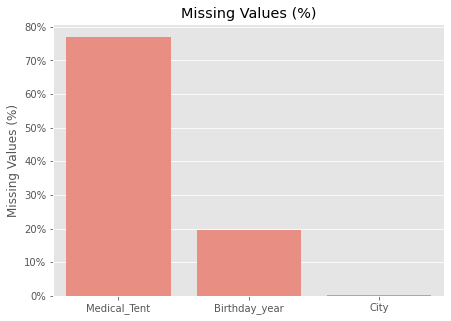

In [25]:
# Missing values (train)

train_na = pd.DataFrame(train.isna().sum()/train.shape[0], 
                             columns = ['Missing Values (%)']).sort_values(by = 'Missing Values (%)', ascending = False, )
train_na = train_na[train_na['Missing Values (%)'] > 0].copy()

plt.figure(figsize = (7,5))
ax = sns.barplot(data = train_na, x = train_na.index, y = 'Missing Values (%)', color = 'salmon')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.title('Missing Values (%)')
plt.show()

In [26]:
train.describe(include = 'O')

,Name,Medical_Tent,City
count,720,166,718
unique,720,8,3
top,Ms. Brandi Viola,C,Santa Fe
freq,1,49,521


In [27]:
# Make a copy on test dataset to avoid messing the original dataframe.
test2 = test.copy()

In [28]:
# dropping the values in the "city" feature as they have no representation/weight in the dataset itself, since it's
# only 1 row.

train.dropna(subset = ['City'], inplace = True)
val.dropna(subset = ['City'], inplace = True)
test2.dropna(subset = ['City'], inplace = True)

maybe.dropna(subset = ['City'], inplace = True)

In [29]:
# Dropping the column Medical_Tent since it's data in missing on close to 80% of the rows on our train dataset.

train.drop(columns = ['Medical_Tent'], inplace = True)
val.drop(columns = ['Medical_Tent'], inplace = True)
test2.drop(columns = ['Medical_Tent'], inplace = True)

maybe.drop(columns = ['Medical_Tent'], inplace = True)

In [30]:
train.shape

(718, 10)

In [31]:
# Filling the rows with missing value on the feature birthday_year with the mean of Birthday_year on our dataset.
train['Birthday_year'] = train['Birthday_year'].fillna(train['Birthday_year'].mean())
val['Birthday_year'] = val['Birthday_year'].fillna(val['Birthday_year'].mean())
test2['Birthday_year'] = test2['Birthday_year'].fillna(test2['Birthday_year'].mean())

maybe['Birthday_year'] = maybe['Birthday_year'].fillna(maybe['Birthday_year'].mean())

In [32]:
# Convert Birthday_year from float to integer.
train['Birthday_year'] = train['Birthday_year'].astype('int32')
val['Birthday_year'] = val['Birthday_year'].astype('int32')
test2['Birthday_year'] = test2['Birthday_year'].astype('int32')

maybe['Birthday_year'] = maybe['Birthday_year'].astype('int32')
train

,Patient_ID,Family_Case_ID,Severity,Name,Birthday_year,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,City,Deceased
95,96,6828,3,Miss Marlene Jaime,1990,0,0,219,Taos,0
744,745,6480,1,Mr. Jermaine Keith,1982,0,0,0,Santa Fe,1
463,464,14287,3,Ms. Holly Raquel,1995,0,0,218,Santa Fe,1
14,15,6507,3,Miss Pearl Elsie,1990,0,0,217,Taos,0
634,635,11508,3,Mr. Irvin Trevor,2001,0,0,285,Santa Fe,1
...,...,...,...,...,...,...,...,...,...,...
334,335,17298,3,Ms. Karla Lucy,1990,0,0,349,Santa Fe,0
621,622,15677,3,Master Roosevelt Salvatore,1990,0,0,218,Santa Fe,0
595,596,14502,3,Master Brent Jordan,1990,2,8,1947,Santa Fe,1
851,852,22936,3,Mr. Dewey Nicolas,1991,0,1,197,Santa Fe,1


In [33]:
# We verify that we have no missing values anymore.
train.isna().sum()

Patient_ID                   0
Family_Case_ID               0
Severity                     0
Name                         0
Birthday_year                0
Parents_Children_Infected    0
Partner_Siblings_Infected    0
Medical_Expenses_Family      0
City                         0
Deceased                     0
dtype: int64

2. Outliers Identification and Removal

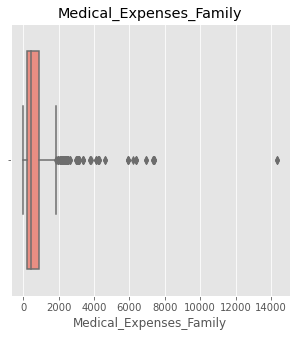

In [34]:
plt.figure(figsize = (5,5))
sns.boxplot(data = train, x = 'Medical_Expenses_Family', color = 'salmon')
plt.title('Medical_Expenses_Family')
plt.show()

In [35]:
# Check how many outliers we have on this feature
print(train[train['Medical_Expenses_Family'] > 10000]['Medical_Expenses_Family'].count()) 

2


In [36]:
# Remove the said values
train = train[train['Medical_Expenses_Family'] <= 10000]
maybe = maybe[maybe['Medical_Expenses_Family'] <= 10000]

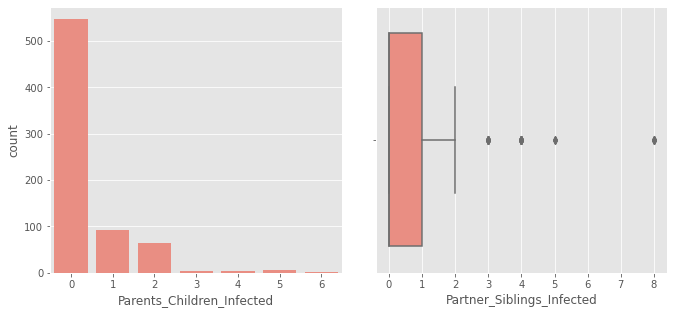

In [37]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
sns.countplot(data = train, x = 'Parents_Children_Infected', ax = ax[0], color = 'salmon')
sns.boxplot(data = train, x = 'Partner_Siblings_Infected', ax = ax[1], color = 'salmon')
plt.tight_layout(pad = 3)
plt.show()

In [38]:
train.shape

(716, 10)

In [39]:
# Check how many outliers we have on this feature
print(train[train['Partner_Siblings_Infected'] > 7]['Partner_Siblings_Infected'].count())

6


In [40]:
# Remove the said values
train = train[train['Partner_Siblings_Infected'] <= 5]
maybe = maybe[maybe['Partner_Siblings_Infected'] <= 5]

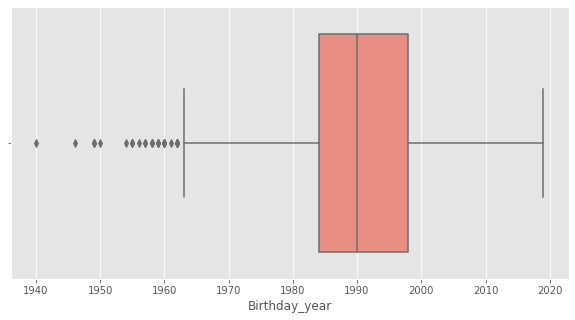

In [41]:
plt.figure(figsize = (10,5))
sns.boxplot(data = train, x = 'Birthday_year', color = 'salmon')
plt.show()

In [42]:
# Check how many outliers we have on this feature and remove the said values
print(train[train['Birthday_year'] < 1955]['Birthday_year'].count())
train = train[train['Birthday_year'] >= 1955]
maybe = maybe[maybe['Birthday_year'] >= 1955]

7


3. ### Feature Engineering

In [43]:
# We create the feature age out of birthday year
from datetime import date

train['Age'] = date.today().year - train['Birthday_year']
val['Age'] = date.today().year - val['Birthday_year']
test2['Age'] = date.today().year - test2['Birthday_year']

maybe['Age'] = date.today().year - maybe['Birthday_year']

In [44]:
# We drop the feature birthday_year since we have the age feature now
train.drop(columns = ['Birthday_year'], inplace = True)   
val.drop(columns = ['Birthday_year'], inplace = True)   
test2.drop(columns = ['Birthday_year'], inplace = True)   

maybe.drop(columns = ['Birthday_year'], inplace = True)   

In [45]:
# Here we create a new feature that may be relevant for our study. We'll see the number of Relatives Infected per member.
train['Relatives_Infected'] = 0
train['temp'] = train['Parents_Children_Infected'] + train['Partner_Siblings_Infected']

val['Relatives_Infected'] = 0
val['temp'] = val['Parents_Children_Infected'] + val['Partner_Siblings_Infected']

test2['Relatives_Infected'] = 0
test2['temp'] = test2['Parents_Children_Infected'] + test2['Partner_Siblings_Infected']

maybe['Relatives_Infected'] = 0
maybe['temp'] = maybe['Parents_Children_Infected'] + maybe['Partner_Siblings_Infected']

In [46]:
# With this function we check the sum of infected individuals and sum it for each case. Then for each individual,
# we put the highest value of Infected relatives.
for family in train.Family_Case_ID.unique():
    max1 = 0
    for member in train[train.Family_Case_ID == family].Patient_ID.unique():
        tempValue = (train[train.Family_Case_ID == family][train.Patient_ID == member].temp).to_numpy()[0]
        if tempValue > max1:
            max1 = tempValue
    train['Relatives_Infected'].loc[train['Family_Case_ID'] == family] = max1
    
for family in val.Family_Case_ID.unique():
    max1 = 0
    for member in val[val.Family_Case_ID == family].Patient_ID.unique():
        tempValue = (val[val.Family_Case_ID == family][val.Patient_ID == member].temp).to_numpy()[0]
        if tempValue > max1:
            max1 = tempValue
    val['Relatives_Infected'].loc[val['Family_Case_ID'] == family] = max1

for family in test2.Family_Case_ID.unique():
    max1 = 0
    for member in test2[test2.Family_Case_ID == family].Patient_ID.unique():
        tempValue = (test2[test2.Family_Case_ID == family][test2.Patient_ID == member].temp).to_numpy()[0]
        if tempValue > max1:
            max1 = tempValue
    test2['Relatives_Infected'].loc[test2['Family_Case_ID'] == family] = max1
    
    
for family in maybe.Family_Case_ID.unique():
    max1 = 0
    for member in maybe[maybe.Family_Case_ID == family].Patient_ID.unique():
        tempValue = (maybe[maybe.Family_Case_ID == family][maybe.Patient_ID == member].temp).to_numpy()[0]
        if tempValue > max1:
            max1 = tempValue
    maybe['Relatives_Infected'].loc[maybe['Family_Case_ID'] == family] = max1

In [47]:
train.Relatives_Infected.max()

7

In [48]:
# Here we create the gender feature given the title each person has.
# For males we considered "Mr." and "Master", and female for everything else.

train['Gender'] = 2
val['Gender'] = 2
test2['Gender'] = 2
maybe['Gender'] = 2
for name in train['Name']:
    title = name.split()[0]
    if title == 'Mr.' or title == 'Master':
        train['Gender'].loc[train['Name'] == name] = 1
    else:
        train['Gender'].loc[train['Name'] == name] = 0
        
for name in val['Name']:
    title = name.split()[0]
    if title == 'Mr.' or title == 'Master':
        val['Gender'].loc[val['Name'] == name] = 1
    else:
        val['Gender'].loc[val['Name'] == name] = 0
        
for name in test2['Name']:
    title = name.split()[0]
    if title == 'Mr.' or title == 'Master':
        test2['Gender'].loc[test2['Name'] == name] = 1
    else:
        test2['Gender'].loc[test2['Name'] == name] = 0
        
for name in maybe['Name']:
    title = name.split()[0]
    if title == 'Mr.' or title == 'Master':
        maybe['Gender'].loc[maybe['Name'] == name] = 1
    else:
        maybe['Gender'].loc[maybe['Name'] == name] = 0

In [49]:
# We created a new feature, Spent_Per_Member, that could provide some benefit to ours study and ultimately
# to our model. This feature will contain how much the person spent on his medical treatment, approximately and on average.
# This is calculated by dividing the amount the family spent by the members of the family.
train['Spent_Per_Member'] = 0
val['Spent_Per_Member'] = 0
test2['Spent_Per_Member'] = 0
maybe['Spent_Per_Member'] = 0
for family in train['Family_Case_ID'].unique():
    members = len(train[train.Family_Case_ID == family])
    train['Spent_Per_Member'].loc[train['Family_Case_ID'] == family] = train['Medical_Expenses_Family'].loc[train['Family_Case_ID'] == family] / members
    
for family in val['Family_Case_ID'].unique():
    members = len(val[val.Family_Case_ID == family])
    val['Spent_Per_Member'].loc[val['Family_Case_ID'] == family] = val['Medical_Expenses_Family'].loc[val['Family_Case_ID'] == family] / members

for family in test2['Family_Case_ID'].unique():
    members = len(test2[test2.Family_Case_ID == family])
    test2['Spent_Per_Member'].loc[test2['Family_Case_ID'] == family] = test2['Medical_Expenses_Family'].loc[test2['Family_Case_ID'] == family] / members

    
for family in maybe['Family_Case_ID'].unique():
    members = len(maybe[maybe.Family_Case_ID == family])
    maybe['Spent_Per_Member'].loc[maybe['Family_Case_ID'] == family] = maybe['Medical_Expenses_Family'].loc[maybe['Family_Case_ID'] == family] / members
   

In [50]:
# Dropping the features that are irrelevant for model
train.drop(columns = ['temp','Patient_ID','Family_Case_ID','Name'], inplace = True)
val.drop(columns = ['temp','Patient_ID','Family_Case_ID','Name'], inplace = True)
test2.drop(columns = ['temp','Patient_ID','Family_Case_ID','Name'], inplace = True)      

maybe.drop(columns = ['temp','Patient_ID','Family_Case_ID','Name'], inplace = True)      

In [51]:
# We use one-hot encoding for the feature City

train_dummies = pd.get_dummies(train['City'])
train = pd.concat([train, train_dummies], axis = 1)

val_dummies = pd.get_dummies(val['City'])
val = pd.concat([val, val_dummies], axis = 1)

test_dummies = pd.get_dummies(test2['City'])
test2 = pd.concat([test2, test_dummies], axis = 1)

maybe_dummies = pd.get_dummies(maybe['City'])
maybe = pd.concat([maybe, maybe_dummies], axis = 1)

In [52]:
# Drop the City feature, because it has already been one-hot encoded.
train = train.drop(columns = ['City'])
val = val.drop(columns = ['City'])
test2 = test2.drop(columns = ['City'])
maybe = maybe.drop(columns = ['City'])

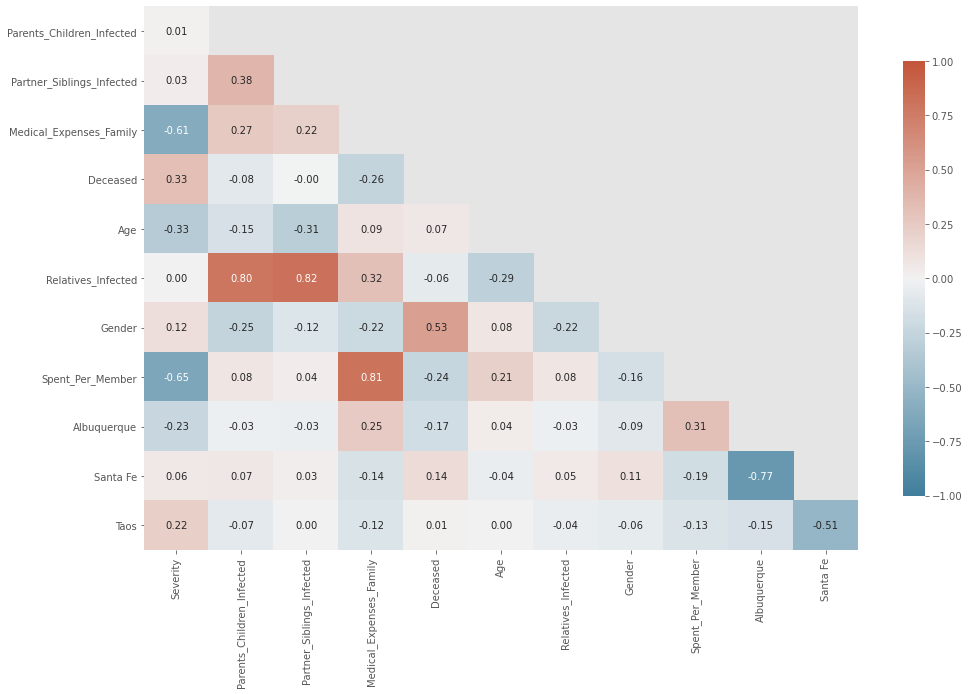

In [53]:
# Correlation heatmap for our train dataset
df_corr = train.corr()

plt.figure(figsize = (16,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# mask
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
# adjust mask and df
mask = mask[1:, :-1]
corr = df_corr.iloc[1:,:-1].copy()
# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap=cmap,
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)

plt.show()


In [54]:
# Quick overview on how ours features correlate with the target variable (Deceased)
train[train.columns[1:]].corr()['Deceased'][:].sort_values(ascending=False)

Deceased                     1.000000
Gender                       0.529905
Santa Fe                     0.144131
Age                          0.070288
Taos                         0.009302
Partner_Siblings_Infected   -0.004397
Relatives_Infected          -0.062863
Parents_Children_Infected   -0.078626
Albuquerque                 -0.172772
Spent_Per_Member            -0.238267
Medical_Expenses_Family     -0.256219
Name: Deceased, dtype: float64

# Standard Scaler

In [55]:
# Here we apply the Standard Scaler to scale our data.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(train.drop(columns = ['Deceased']))

x_train_scaled = scaler.transform(train.drop(columns = ['Deceased']))
x_train_scaled = pd.DataFrame(x_train_scaled, columns = train.drop(columns = ['Deceased']).columns, index = train.index)

x_val_scaled = scaler.transform(val.drop(columns = ['Deceased']))
x_val_scaled = pd.DataFrame(x_val_scaled, columns = val.drop(columns = ['Deceased']).columns, index = val.index)

x_test_scaled = scaler.transform(test2)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = test2.columns, index = test2.index)

x_maybe_scaled = scaler.transform(maybe.drop(columns = ['Deceased']))
x_maybe_scaled = pd.DataFrame(x_maybe_scaled, columns = maybe.drop(columns = ['Deceased']).columns, index = maybe.index)

x_train_scaled.head()

,Severity,Parents_Children_Infected,Partner_Siblings_Infected,Medical_Expenses_Family,Age,Relatives_Infected,Gender,Spent_Per_Member,Albuquerque,Santa Fe,Taos
95,0.835159,-0.457924,-0.542838,-0.539946,0.037239,-0.631777,-1.337790,-0.484028,-0.474066,-1.631398,3.187276
744,-1.551494,-0.457924,-0.542838,-0.722187,0.666167,-0.631777,0.747501,-0.835823,-0.474066,0.612971,-0.313748
463,0.835159,-0.457924,-0.542838,-0.540778,-0.355841,-0.631777,-1.337790,-0.485634,-0.474066,0.612971,-0.313748
14,0.835159,-0.457924,-0.542838,-0.541610,0.037239,-0.631777,-1.337790,-0.487241,-0.474066,-1.631398,3.187276
634,0.835159,-0.457924,-0.542838,-0.485024,-0.827537,-0.631777,0.747501,-0.378008,-0.474066,0.612971,-0.313748


In [56]:
# Our target variable
y_train = train.Deceased
y_val = val.Deceased
y_maybe = maybe.Deceased

# Feature Importance

In [57]:
# Here we check the feature importance, by evaluating it through different measures. We used:
# Pearson, Chi Squared, RFE, Logistic Regression and Random Forest.
# This outputs the importance each feature has per measure
feature_name = train.drop(columns = ['Deceased']).columns.tolist()

def cor_selector(X, y):
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-8:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(train.drop(columns = ['Deceased']), y_train)
print(str(len(cor_feature)), 'selected features')


from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
chi_selector = SelectKBest(chi2, k=8)
chi_selector.fit(train.drop(columns = ['Deceased']), y_train)

chi_support = chi_selector.get_support()
chi_feature = train.drop(columns = ['Deceased']).loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')


from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=8, step=10, verbose=5)
rfe_selector.fit(train.drop(columns = ['Deceased']), y_train)

rfe_support = rfe_selector.get_support()
rfe_feature = train.drop(columns = ['Deceased']).loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')


from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l2"), '1.25*median')
embeded_lr_selector.fit(train.drop(columns = ['Deceased']), y_train)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = train.drop(columns = ['Deceased']).loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')


from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(train.drop(columns = ['Deceased']), y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = train.drop(columns = ['Deceased']).loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')


embeded_lgb_support = []


pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'Chi-2':chi_support, 'RFE':rfe_support, 'Logistics':embeded_lr_support,
                                    'Random Forest':embeded_rf_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)

8 selected features
8 selected features
Fitting estimator with 11 features.
8 selected features
5 selected features
5 selected features


,Feature,Pearson,Chi-2,RFE,Logistics,Random Forest,Total
1,Severity,True,True,True,True,True,5
2,Gender,True,True,True,True,True,5
3,Parents_Children_Infected,True,True,True,True,False,4
4,Albuquerque,True,True,True,True,False,4
5,Age,True,True,True,False,True,4
6,Spent_Per_Member,True,True,False,False,True,3
7,Santa Fe,True,False,True,True,False,3
8,Medical_Expenses_Family,True,True,False,False,True,3
9,Relatives_Infected,False,True,True,False,False,2
10,Taos,False,False,True,False,False,1


#  Sample tuning

### Iteração com unscaled data

In [58]:
# Here we're checking the accuracy variation given different data samples.
# We concluded that it's very important to have a nice sample of data on the split, since it impacts a lot the accuracy of the model
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

best_train = []
best_val = []
highest_score = 0
n_features = 0

for x in range(0, 10):
    trial_train, trial_val = train_test_split(maybe, test_size = 0.2)
    
    x_trial_train = trial_train.drop(columns = ['Deceased'])
    x_trial_val = trial_val.drop(columns = ['Deceased'])
    y_trial_train = trial_train.Deceased
    y_trial_val = trial_val.Deceased
    
    nof_list=np.arange(1,11)
    score_list = []
    high_score=0
    nof=0 
    for n in range(len(nof_list)):
        log_model = LogisticRegression()
        rfe = RFE(log_model,nof_list[n])
        X_train_rfe = rfe.fit_transform(x_trial_train, y_trial_train)
        X_val_rfe = rfe.transform(x_trial_val)
        log_model.fit(X_train_rfe, y_trial_train)

        score = log_model.score(X_val_rfe, y_trial_val)
        score_list.append(score)

        if(score>high_score):
            high_score = score
            nof = nof_list[n]
    
    if high_score > highest_score:
        highest_score = high_score
        n_features = nof
        best_train = trial_train
        best_val = trial_val

print(highest_score)
print(n_features)

0.8352272727272727
9


### Iteração score de NN default

In [59]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

for x in range(0, 10):
    trial_train, trial_val = train_test_split(maybe, test_size = 0.2)
    
    x_trial_train = trial_train[['Severity', 'Gender', 'Spent_Per_Member', 'Santa Fe', 'Partner_Siblings_Infected', 'Parents_Children_Infected', 'Albuquerque']]
    x_trial_val = trial_val[['Severity', 'Gender', 'Spent_Per_Member', 'Santa Fe', 'Partner_Siblings_Infected', 'Parents_Children_Infected', 'Albuquerque']]
    y_trial_train = trial_train.Deceased
    y_trial_val = trial_val.Deceased
    
    valscore_total = 0
    trainscore_total = 0
    for y in range(0, 10):
        mlp = MLPClassifier()
        mlp.fit(x_trial_train, y_trial_train)

        predict_train = mlp.predict(x_trial_train)
        predict_val = mlp.predict(x_trial_val)
        
        valscore = mlp.score(x_trial_val, y_trial_val)
        trainscore = mlp.score(x_trial_train, y_trial_train)
        
        valscore_total = valscore_total + valscore
        trainscore_total = trainscore_total + trainscore
        
    
    print("A sample " + str(x) + " teve uma accuracy média no validation de " + str(valscore_total/10) + " e no train de " + str(trainscore_total/10))

A sample 0 teve uma accuracy média no validation de 0.6767045454545453 e no train de 0.7177556818181818
A sample 1 teve uma accuracy média no validation de 0.6761363636363636 e no train de 0.7025568181818183
A sample 2 teve uma accuracy média no validation de 0.7147727272727273 e no train de 0.7301136363636364
A sample 3 teve uma accuracy média no validation de 0.7051136363636364 e no train de 0.7356534090909091
A sample 4 teve uma accuracy média no validation de 0.6937500000000001 e no train de 0.7041193181818182
A sample 5 teve uma accuracy média no validation de 0.7136363636363636 e no train de 0.7180397727272727
A sample 6 teve uma accuracy média no validation de 0.7227272727272728 e no train de 0.7164772727272727
A sample 7 teve uma accuracy média no validation de 0.6852272727272727 e no train de 0.7042613636363637
A sample 8 teve uma accuracy média no validation de 0.6954545454545454 e no train de 0.7288352272727273
A sample 9 teve uma accuracy média no validation de 0.7357954545

### Iterações score RFC

In [60]:
from sklearn.ensemble import RandomForestClassifier

for x in range(0, 10):
    trial_train, trial_val = train_test_split(maybe, test_size = 0.2)
    
    x_trial_train = trial_train[['Severity', 'Gender', 'Spent_Per_Member', 'Santa Fe', 'Partner_Siblings_Infected', 'Parents_Children_Infected', 'Albuquerque']]
    x_trial_val = trial_val[['Severity', 'Gender', 'Spent_Per_Member', 'Santa Fe', 'Partner_Siblings_Infected', 'Parents_Children_Infected', 'Albuquerque']]
    y_trial_train = trial_train.Deceased
    y_trial_val = trial_val.Deceased
    
    valscore_total = 0
    trainscore_total = 0
    for y in range(0, 100):
        # n_estimators = number of decision trees
        rf = RandomForestClassifier(n_estimators=25, max_depth=3)
        rf.fit(x_trial_train, y_trial_train)
        valscore = rf.score(x_trial_val, y_trial_val)
        trainscore = rf.score(x_trial_train, y_trial_train)
        
        valscore_total = valscore_total + valscore
        trainscore_total = trainscore_total + trainscore
        
    
    print("A sample " + str(x) + " teve uma accuracy média no validation de " + str(valscore_total/100) + " e no train de " + str(trainscore_total/100))


A sample 0 teve uma accuracy média no validation de 0.8061931818181816 e no train de 0.8062357954545457
A sample 1 teve uma accuracy média no validation de 0.7796590909090914 e no train de 0.8044602272727275
A sample 2 teve uma accuracy média no validation de 0.8011363636363636 e no train de 0.8035653409090913
A sample 3 teve uma accuracy média no validation de 0.7445454545454543 e no train de 0.8203977272727275
A sample 4 teve uma accuracy média no validation de 0.7732386363636365 e no train de 0.803622159090909
A sample 5 teve uma accuracy média no validation de 0.7882954545454544 e no train de 0.8097301136363636
A sample 6 teve uma accuracy média no validation de 0.7785227272727276 e no train de 0.8050710227272723
A sample 7 teve uma accuracy média no validation de 0.7823863636363639 e no train de 0.8108380681818177
A sample 8 teve uma accuracy média no validation de 0.8107386363636364 e no train de 0.7951846590909086
A sample 9 teve uma accuracy média no validation de 0.78687500000

In [61]:
# Check once again with RFE the best features to use.
from sklearn.feature_selection import RFE

rfe = RFE(estimator = log_model, n_features_to_select = 7)
X_rfe = rfe.fit_transform(X = best_train.drop(columns = ['Deceased']), y = best_train.Deceased) 
log_model.fit(X = X_rfe, y = best_train.Deceased)
print(rfe.support_)
print(rfe.ranking_)
selected_features = pd.Series(rfe.support_, index = best_train.drop(columns = ['Deceased']).columns)
print(selected_features)

[ True  True  True False False  True  True False  True  True False]
[1 1 1 5 3 1 1 4 1 1 2]
Severity                      True
Parents_Children_Infected     True
Partner_Siblings_Infected     True
Medical_Expenses_Family      False
Age                          False
Relatives_Infected            True
Gender                        True
Spent_Per_Member             False
Albuquerque                   True
Santa Fe                      True
Taos                         False
dtype: bool


### Mutual Information

Index(['Severity', 'Medical_Expenses_Family', 'Relatives_Infected', 'Gender',
       'Spent_Per_Member'],
      dtype='object')

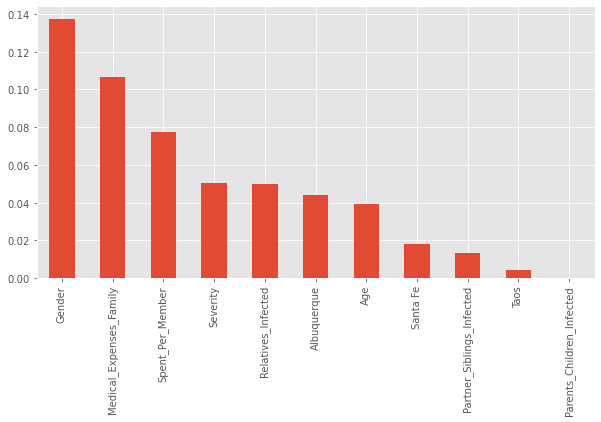

In [62]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

# determine the mutual information
mutual_info = mutual_info_classif(best_train.drop(columns = ['Deceased']), best_train.Deceased)
mutual_info = pd.Series(mutual_info)
mutual_info.index = best_train.drop(columns = ['Deceased']).columns
mutual_info.sort_values(ascending = False)

# plot it
mutual_info.sort_values(ascending = False).plot.bar(figsize = (10,5))

# select the top 5 features
top_features = SelectKBest(mutual_info_classif, k = 5)
top_features.fit(best_train.drop(columns = ['Deceased']), best_train.Deceased)
best_train.drop(columns = ['Deceased']).columns[top_features.get_support()]

# Drop unused features

In [63]:
# Here with define with are the features we want to use on our model
X_train_features = x_train_scaled[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]
X_val_features = x_val_scaled[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]
X_maybe_features = x_maybe_scaled[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]

X_test_features = x_test_scaled[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]

# Logistic Regression default

In [64]:
from sklearn.linear_model import LogisticRegression

# Fitting the model with the train data and using the test X to predict Y.
model = LogisticRegression(random_state = 100)

model.fit(X_train_features, y_train)

# Predicting on val data
y_pred = model.predict(X_val_features) #V1

# Predicting on test data
y_pred_test = model.predict(X_test_features)

In [65]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [66]:
from sklearn.metrics import classification_report,confusion_matrix
print('Results on the validation set:')
print(
    # write your code in here
    classification_report(y_true = y_val, y_pred = y_pred)
)

Results on the validation set:
              precision    recall  f1-score   support

           0       0.74      0.75      0.74        64
           1       0.86      0.85      0.86       116

    accuracy                           0.82       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.82      0.82      0.82       180



In [67]:
result = pd.DataFrame(y_pred_test, columns = ['Deceased'])
frames = [test, result]
finalresult = pd.concat(frames, axis=1, join="inner")
finalresult = finalresult[['Patient_ID', 'Deceased']]
finalresult = finalresult.set_index('Patient_ID')
finalresult.to_csv('attempt36.csv')

## GridSearch

In [68]:
# Estas foram as features que usamos no modelo abaixo para obter 0.82857
# Feito com StandardScaler
# mlp = MLPClassifier(activation = 'relu', hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', learning_rate_init = 0.05000500000000001, solver = 'adam') 
#X_train_features = x_train_scaled[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]
#X_val_features = x_val_scaled[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]
#X_maybe_features = x_maybe_scaled[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]

#X_test_features = x_test_scaled[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]

## Best model

In [69]:
import warnings
warnings.filterwarnings('ignore')
import time
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [70]:
parameter_space = {
    'hidden_layer_sizes': [(50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'learning_rate_init': list(np.linspace(0.00001,0.1,5)),
    'learning_rate': ['constant','adaptive']
}
model = MLPClassifier()
clf = GridSearchCV(model, parameter_space)

In [71]:
clf.fit(X_maybe_features, y_maybe)
clf.best_params_

In [72]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(activation = 'relu', hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', learning_rate_init = 0.05000500000000001, solver = 'adam') 
mlp.fit(X_maybe_features, y_maybe)

predict_train = mlp.predict(X_train_features)
predict_val = mlp.predict(X_val_features)
predict_test = mlp.predict(X_test_features)

predict_maybe = mlp.predict(X_maybe_features)


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_val,predict_val))
print(classification_report(y_val,predict_val))

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_maybe,predict_maybe))
print(classification_report(y_maybe,predict_maybe))

[[197  81]
 [ 19 406]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       278
           1       0.83      0.96      0.89       425

    accuracy                           0.86       703
   macro avg       0.87      0.83      0.84       703
weighted avg       0.86      0.86      0.85       703

[[ 48  16]
 [  6 110]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        64
           1       0.87      0.95      0.91       116

    accuracy                           0.88       180
   macro avg       0.88      0.85      0.86       180
weighted avg       0.88      0.88      0.88       180

[[245  96]
 [ 26 513]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80       341
           1       0.84      0.95      0.89       539

    accuracy                           0.86       880
   macro avg       0.87      0.84      0.85       880
weigh

In [73]:
result = pd.DataFrame(predict_test, columns = ['Deceased'])
frames = [test, result]
finalresult = pd.concat(frames, axis=1, join="inner")
finalresult = finalresult[['Patient_ID', 'Deceased']]
finalresult = finalresult.set_index('Patient_ID')
finalresult.to_csv('attempt42.csv')

In [74]:
# Testing cell, not relevant for the last submission
#from sklearn.neural_network import MLPClassifier

#mlp = MLPClassifier(activation = 'tanh', hidden_layer_sizes = (100,), learning_rate = 'constant', learning_rate_init = 0.025007500000000002, solver = 'sgd') 
#mlp.fit(x_maybe_scaled[['Severity','Medical_Expenses_Family','Relatives_Infected','Gender']], y_maybe)
#mlp.fit(x_maybe_scaled, y_maybe)

#predict_train = mlp.predict(x_train_scaled[['Severity','Medical_Expenses_Family','Relatives_Infected','Gender']])
#predict_val = mlp.predict(x_val_scaled[['Severity','Medical_Expenses_Family','Relatives_Infected','Gender']])
#predict_test = mlp.predict(x_test_scaled[['Severity','Medical_Expenses_Family','Relatives_Infected','Gender']])

#predict_maybe = mlp.predict(x_maybe_scaled[['Severity','Medical_Expenses_Family','Relatives_Infected','Gender']])


#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_train,predict_train))
#print(classification_report(y_train,predict_train))

#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_val,predict_val))
#print(classification_report(y_val,predict_val))

#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(y_maybe,predict_maybe))
#print(classification_report(y_maybe,predict_maybe))

# MLP Default parameters with different scalers

In [75]:
# Checking the accuracy with default MLP parameters
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
model_scaler = mlp.fit(X_train_features, y_train)

predict_train = mlp.predict(X_train_features)
predict_val = mlp.predict(X_val_features)

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))


from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_val,predict_val))
print(classification_report(y_val,predict_val))

print(mlp.score(X_val_features, y_val))

[[189  89]
 [ 22 403]]
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       278
           1       0.82      0.95      0.88       425

    accuracy                           0.84       703
   macro avg       0.86      0.81      0.83       703
weighted avg       0.85      0.84      0.84       703

[[ 42  22]
 [ 11 105]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        64
           1       0.83      0.91      0.86       116

    accuracy                           0.82       180
   macro avg       0.81      0.78      0.79       180
weighted avg       0.81      0.82      0.81       180

0.8166666666666667


In [76]:
X_train_features_p = train[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]
X_val_features_p = val[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]
X_maybe_features_p = maybe[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]
X_test_features_p = test2[['Gender','Severity','Age','Santa Fe','Albuquerque','Relatives_Infected','Partner_Siblings_Infected']]

In [77]:
# Checking score with MinMax Scaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X_train_features_p)

x_train_scaled_mm = scaler.transform(X_train_features_p)
x_train_scaled_mm = pd.DataFrame(x_train_scaled, columns = X_train_features_p.columns, index = X_train_features_p.index)

x_val_scaled_mm = scaler.transform(X_val_features_p)
x_val_scaled_mm = pd.DataFrame(x_val_scaled_mm, columns = X_val_features_p.columns, index = X_val_features_p.index)

x_test_scaled_mm = scaler.transform(X_test_features_p)
x_test_scaled_mm = pd.DataFrame(x_test_scaled_mm, columns = X_test_features_p.columns, index = X_test_features_p.index)

x_train_scaled.head()

model_scaler_minmax = mlp.fit(x_train_scaled_mm, y_train)

# min max scaler score
model_scaler_minmax.score(x_val_scaled_mm, y_val)

0.6444444444444445

In [78]:
# Checking score with Robust Scaler
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler().fit(X_train_features_p)

x_train_scaled_rs = scaler.transform(X_train_features_p)
x_train_scaled_rs = pd.DataFrame(x_train_scaled_rs, columns = X_train_features_p.columns, index = X_train_features_p.index)

x_val_scaled_rs = scaler.transform(X_val_features_p)
x_val_scaled_rs = pd.DataFrame(x_val_scaled_rs, columns = X_val_features_p.columns, index = X_val_features_p.index)

x_test_scaled_rs = scaler.transform(X_test_features_p)
x_test_scaled_rs = pd.DataFrame(x_test_scaled_rs, columns = X_test_features_p.columns, index = X_test_features_p.index)

x_train_scaled.head()

model_scaler_rs = mlp.fit(x_train_scaled_rs, y_train)
# robust scaler score
model_scaler_rs.score(x_val_scaled_rs, y_val)

0.8166666666666667

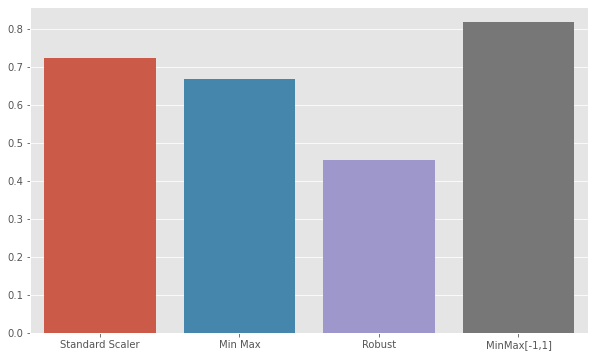

In [79]:
scaler = MinMaxScaler(feature_range = (-1,1)).fit(X_train_features_p)

x_train_scaled_mmr = scaler.transform(X_train_features_p)
x_train_scaled_mmr = pd.DataFrame(x_train_scaled_mmr, columns = X_train_features_p.columns, index = X_train_features_p.index)

x_val_scaled_mmr = scaler.transform(X_val_features_p)
x_val_scaled_mmr = pd.DataFrame(x_val_scaled_mmr, columns = X_val_features_p.columns, index = X_val_features_p.index)

x_test_scaled_mmr = scaler.transform(X_test_features_p)
x_test_scaled_mmr = pd.DataFrame(x_test_scaled_mmr, columns = X_test_features_p.columns, index = X_test_features_p.index)

x_train_scaled.head()

model_scaler_range = mlp.fit(x_train_scaled_mmr, y_train)

# minmax scaler range score
model_scaler_range.score(x_val_scaled_mmr, y_val)

x = ['Standard Scaler', 'Min Max', 'Robust', 'MinMax[-1,1]']
y = [model_scaler.score(X_val_features, y_val), model_scaler_minmax.score(x_val_scaled_mm, y_val), 
    model_scaler_rs.score(x_val_scaled_rs, y_val),model_scaler_range.score(x_val_scaled_mmr, y_val)]
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.barplot(x, y)
plt.show()

# ---------------------------------

In [81]:
# Checking the accuracy with default Random Forest Classifier parameters
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=25, max_depth=3)
rf.fit(X_maybe_features, y_maybe)
print("score on validation: " + str(rf.score(X_val_features, y_val)))
print("score on train: "+ str(rf.score(X_maybe_features, y_maybe)))

score on validation: 0.8444444444444444
score on train: 0.8193181818181818


# Random Forest Regressor parameter tuning attempt - not the best model

In [82]:
# Checking the default Random Forest Regressor parameters
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [83]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [84]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_maybe_features, y_maybe)
rf_random.best_params_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.6min finished


{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [85]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestRegressor(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 4, max_features = 'auto', max_depth = 10, bootstrap = True)
base_model.fit(X_maybe_features, y_maybe)

predict_train = base_model.predict(X_train_features)
predict_val = base_model.predict(X_val_features)

predict_train = predict_train.round()
predict_val = predict_val.round()
predict_test = base_model.predict(X_test_features).round().astype('int32')

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_val,predict_val))
print(classification_report(y_val,predict_val))


result = pd.DataFrame(predict_test, columns = ['Deceased'])
frames = [test, result]
finalresult = pd.concat(frames, axis=1, join="inner")
finalresult = finalresult[['Patient_ID', 'Deceased']]
finalresult = finalresult.set_index('Patient_ID')
finalresult.to_csv('attempt43.csv')

[[213  65]
 [ 30 395]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       278
           1       0.86      0.93      0.89       425

    accuracy                           0.86       703
   macro avg       0.87      0.85      0.86       703
weighted avg       0.87      0.86      0.86       703

[[ 51  13]
 [ 11 105]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        64
           1       0.89      0.91      0.90       116

    accuracy                           0.87       180
   macro avg       0.86      0.85      0.85       180
weighted avg       0.87      0.87      0.87       180



In [86]:
best_model = RandomForestRegressor(n_estimators = 1600, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto', max_depth = None, bootstrap = True)
best_model.fit(X_maybe_features, y_maybe)

predict_train = best_model.predict(X_train_features)
predict_val = best_model.predict(X_val_features)

predict_train = predict_train.round()
predict_val = predict_val.round()
predict_test = best_model.predict(X_test_features).round().astype('int32')

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_val,predict_val))
print(classification_report(y_val,predict_val))


result = pd.DataFrame(predict_test, columns = ['Deceased'])
frames = [test, result]
finalresult = pd.concat(frames, axis=1, join="inner")
finalresult = finalresult[['Patient_ID', 'Deceased']]
finalresult = finalresult.set_index('Patient_ID')
finalresult.to_csv('attempt44.csv')

[[213  65]
 [ 28 397]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       278
           1       0.86      0.93      0.90       425

    accuracy                           0.87       703
   macro avg       0.87      0.85      0.86       703
weighted avg       0.87      0.87      0.87       703

[[ 51  13]
 [  9 107]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82        64
           1       0.89      0.92      0.91       116

    accuracy                           0.88       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.88      0.88      0.88       180



# Results